# **Data analysis of resarch data**

Below is all the code that was used for the data analysis, though maybe not completely in the same order as presented in the thesis.

An example of data was added to the repository in order to give a better understanding of the code.

# Data pre-processing

In [13]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statistics
import datetime

In [14]:
#Reading the data-file
orig_df = pd.read_csv('example_data.csv')

In [15]:
#Makning a copy of the df to keep an original
df = orig_df.copy()

#Add an id to every respondent
df['id'] = range(1, len(df) + 1)



In [16]:
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split



In [17]:
#Checking initial types
df.dtypes


Submission Date                                                                                                                                      object
No Label                                                                                                                                             object
Hur gammal är du?                                                                                                                                     int64
Vänligen ange din könstillhörighet                                                                                                                   object
No Label.1                                                                                                                                           object
Annat:                                                                                                                                              float64
Designen av streamingtjänster kan påverka människors val och bet

In [18]:
#Deleting empty or redundant columns

del df['No Label'] #was just holding the same line for every respondent
del df["Annat:"] #Empty column



In [19]:


#reanaming columns of part 1
df.rename(columns = {'Hur gammal är du?':'ålder',
                    'Vänligen ange din könstillhörighet':'kön',
                    'No Label.1':'utbildning',


#renaming columns of part 2
                    'Designen av streamingtjänster kan påverka människors val och beteende':'medvetenhet_andra',
                    'Designen av streamingtjänster kan påverka mina val och beteende':'medvetenhet_mig',
                    'Kan du namnge en streamingtjänst som redan påverkar dina val och beteende? Beskriv vad som hände.':'medvetenhet_kval',

#renaming columns of part 3
                    'På streamingtjänster ser jag på film/serier/klipp':'användarfrekvens',
                    '...låter jag nästa film/avsnitt/klipp automatiskt spela efter att den föregående har tagit slut':'påverkas_autoplay',
                    '...tittar jag på de filmer/serier/klipp som tjänsten rekommenderar till mig':'påverkas_rekom',
                    '...tittar jag på en film/serie/klipp på grund av att jag av händelse råkade spela upp  förhandsvisningar/snabbtitt*':'påverkas_snabbtitt',
                    '...så gör mängden rekommendationer och hur väl rekommendationerna är anpassade efter min smak att jag mer impulsivt väljer en film/avsnitt/klipp':'påverkas_överväldRek',
                    '...använder jag funktioner som gör att jag tittar mindre impulsivt**':'påverkas_gömdaFeat',
                    '...använder jag sökfunktionen istället för att bläddra bland rekommendationer':'påverkas_sökfunk',

#renaming columns of part 4
                    'Vilka element på sidan skulle kunna vara manipulativa? OCH varför tror du att streamingtjänster använder dessa element?':'förm_att_hitta_1',
                    'Vilka element på sidan skulle kunna vara manipulativa? OCH varför tror du att streamingtjänster använder dessa element?.1':'förm_att_hitta_2',
                    'Vilka element på sidan skulle kunna vara manipulativa? OCH varför tror du att streamingtjänster använder dessa element?.2':'förm_att_hitta_3',
                    'Vilka element på sidan skulle kunna vara manipulativa? OCH varför tror du att streamingtjänster använder dessa element?.3':'förm_att_hitta_kotroll',
                    'Vilka element på sidan skulle kunna vara manipulativa? OCH varför tror du att streamingtjänster använder dessa element?.4':'förm_att_hitta_4',
                    'Vilka element på sidan skulle kunna vara manipulativa? OCH varför tror du att streamingtjänster använder dessa element?.5':'förm_att_hitta_5',


#renaming columns of part 5
                    'Jag kan tänka mig att denna strategi skulle kunna påverka mina val och mitt beteende':'självrapporterat_påverkad_1',
                    'Jag tycker att denna strategi är acceptabel':'finner_acceptabel_1',
                    'Jag kan tänka mig att denna strategi skulle kunna påverka mina val och mitt beteende.1':'självrapporterat_påverkad_2',
                    'Jag tycker att denna strategi är acceptabel.1':'finner_acceptabel_2',
                    'Jag kan tänka mig att denna strategi skulle kunna påverka mina val och mitt beteende.2':'självrapporterat_påverkad_3',
                    'Jag tycker att denna strategi är acceptabel.2':'finner_acceptabel_3',
                    'Jag kan tänka mig att denna strategi skulle kunna påverka mina val och mitt beteende.3':'självrapporterat_påverkad_4',
                    'Jag tycker att denna strategi är acceptabel.3':'finner_acceptabel_4',
                    'Jag kan tänka mig att denna strategi skulle kunna påverka mina val och mitt beteende.4':'självrapporterat_påverkad_5',
                    'Jag tycker att denna strategi är acceptabel.4':'finner_acceptabel_5',
                    

#renaming columns of part 6
                    'Skulle du vilja dela något övrigt om din erfarenhet med manipulativ design på streamingtjänster eller något om denna enkät? (frivillig)':'övriga_kommentarer'
                    }, inplace = True)




In [20]:
#quantifiy answers in part 1
df.kön = df.kön.replace('Kvinna', '0')
df.kön = df.kön.replace('Man', '1')
df.kön = df.kön.replace('Annat', '2')
df.kön = df.kön.replace('Vill inte ange', '-1')

df.utbildning = df.utbildning.replace(to_replace='Ingen gymnasieutbildning', value='0')
df.utbildning = df.utbildning.replace(to_replace='Gymnasieutbildning eller likvärdigt', value='1')
df.utbildning = df.utbildning.replace(to_replace='Eftergymnasial yrkesutbildning', value='2')
df.utbildning = df.utbildning.replace(to_replace='Kandidatexamen', value='3')
df.utbildning = df.utbildning.replace(to_replace='Masterexamen', value='4')
df.utbildning = df.utbildning.replace(to_replace='Doktorsexamen', value='5')

#changing data type of columns in part 1
df.kön = df.kön.astype('int32')
df.utbildning = df.utbildning.astype('int32')

#quantifiy answers in part 2
df.medvetenhet_andra = df.medvetenhet_andra.replace(to_replace='Håller inte alls med', value='-2')
df.medvetenhet_andra = df.medvetenhet_andra.replace(to_replace='Håller inte med', value='-1')
df.medvetenhet_andra = df.medvetenhet_andra.replace(to_replace='Osäker', value='0')
df.medvetenhet_andra = df.medvetenhet_andra.replace(to_replace='Håller med', value='1')
df.medvetenhet_andra = df.medvetenhet_andra.replace(to_replace='Håller med starkt', value='2')

df.medvetenhet_mig = df.medvetenhet_mig.replace(to_replace='Håller inte alls med', value='-2')
df.medvetenhet_mig = df.medvetenhet_mig.replace(to_replace='Håller inte med', value='-1')
df.medvetenhet_mig = df.medvetenhet_mig.replace(to_replace='Osäker', value='0')
df.medvetenhet_mig = df.medvetenhet_mig.replace(to_replace='Håller med', value='1')
df.medvetenhet_mig = df.medvetenhet_mig.replace(to_replace='Håller med starkt', value='2')

df.användarfrekvens = df.användarfrekvens.replace(to_replace='Aldrig', value='0')
df.användarfrekvens = df.användarfrekvens.replace(to_replace='En gång om året eller mindre', value='1')
df.användarfrekvens = df.användarfrekvens.replace(to_replace='Några gånger om året', value='2')
df.användarfrekvens = df.användarfrekvens.replace(to_replace='Varje månad', value='3')
df.användarfrekvens = df.användarfrekvens.replace(to_replace='Varje vecka', value='4')
df.användarfrekvens = df.användarfrekvens.replace(to_replace='Varje dag', value='5')

#changing data type of columns in part 2
df.medvetenhet_andra = df.medvetenhet_andra.astype('int32')
df.medvetenhet_mig = df.medvetenhet_mig.astype('int32')
df.användarfrekvens = df.användarfrekvens.astype('int32')

#quantifiy answers in part 3
df.påverkas_autoplay = df.påverkas_autoplay.replace(to_replace='Gäller inte mig', value='-1')
df.påverkas_autoplay = df.påverkas_autoplay.replace(to_replace='Aldrig', value='0')
df.påverkas_autoplay = df.påverkas_autoplay.replace(to_replace='Sällan', value='1')
df.påverkas_autoplay = df.påverkas_autoplay.replace(to_replace='Ibland', value='2')
df.påverkas_autoplay = df.påverkas_autoplay.replace(to_replace='Ofta', value='3')
df.påverkas_autoplay = df.påverkas_autoplay.replace(to_replace='Alltid', value='4')

df.påverkas_rekom = df.påverkas_rekom.replace(to_replace='Gäller inte mig', value='-1')
df.påverkas_rekom = df.påverkas_rekom.replace(to_replace='Aldrig', value='0')
df.påverkas_rekom = df.påverkas_rekom.replace(to_replace='Sällan', value='1')
df.påverkas_rekom = df.påverkas_rekom.replace(to_replace='Ibland', value='2')
df.påverkas_rekom = df.påverkas_rekom.replace(to_replace='Ofta', value='3')
df.påverkas_rekom = df.påverkas_rekom.replace(to_replace='Alltid', value='4')

df.påverkas_snabbtitt = df.påverkas_snabbtitt.replace(to_replace='Gäller inte mig', value='-1')
df.påverkas_snabbtitt = df.påverkas_snabbtitt.replace(to_replace='Aldrig', value='0')
df.påverkas_snabbtitt = df.påverkas_snabbtitt.replace(to_replace='Sällan', value='1')
df.påverkas_snabbtitt = df.påverkas_snabbtitt.replace(to_replace='Ibland', value='2')
df.påverkas_snabbtitt = df.påverkas_snabbtitt.replace(to_replace='Ofta', value='3')
df.påverkas_snabbtitt = df.påverkas_snabbtitt.replace(to_replace='Alltid', value='4')

df.påverkas_överväldRek = df.påverkas_överväldRek.replace(to_replace='Gäller inte mig', value='-1')
df.påverkas_överväldRek = df.påverkas_överväldRek.replace(to_replace='Aldrig', value='0')
df.påverkas_överväldRek = df.påverkas_överväldRek.replace(to_replace='Sällan', value='1')
df.påverkas_överväldRek = df.påverkas_överväldRek.replace(to_replace='Ibland', value='2')
df.påverkas_överväldRek = df.påverkas_överväldRek.replace(to_replace='Ofta', value='3')
df.påverkas_överväldRek = df.påverkas_överväldRek.replace(to_replace='Alltid', value='4')

df.påverkas_gömdaFeat = df.påverkas_gömdaFeat.replace(to_replace='Gäller inte mig', value='-1')
df.påverkas_gömdaFeat = df.påverkas_gömdaFeat.replace(to_replace='Aldrig', value='0')
df.påverkas_gömdaFeat = df.påverkas_gömdaFeat.replace(to_replace='Sällan', value='1')
df.påverkas_gömdaFeat = df.påverkas_gömdaFeat.replace(to_replace='Ibland', value='2')
df.påverkas_gömdaFeat = df.påverkas_gömdaFeat.replace(to_replace='Ofta', value='3')
df.påverkas_gömdaFeat = df.påverkas_gömdaFeat.replace(to_replace='Alltid', value='4')

df.påverkas_sökfunk = df.påverkas_sökfunk.replace(to_replace='Gäller inte mig', value='-1')
df.påverkas_sökfunk = df.påverkas_sökfunk.replace(to_replace='Aldrig', value='0')
df.påverkas_sökfunk = df.påverkas_sökfunk.replace(to_replace='Sällan', value='1')
df.påverkas_sökfunk = df.påverkas_sökfunk.replace(to_replace='Ibland', value='2')
df.påverkas_sökfunk = df.påverkas_sökfunk.replace(to_replace='Ofta', value='3')
df.påverkas_sökfunk = df.påverkas_sökfunk.replace(to_replace='Alltid', value='4')

#changing data type of columns in part 3
df.påverkas_autoplay = df.påverkas_autoplay.astype('int32')
df.påverkas_rekom = df.påverkas_rekom.astype('int32')
df.påverkas_snabbtitt = df.påverkas_snabbtitt.astype('int32')
df.påverkas_överväldRek = df.påverkas_överväldRek.astype('int32')
df.påverkas_gömdaFeat = df.påverkas_gömdaFeat.astype('int32')
df.påverkas_sökfunk = df.påverkas_sökfunk.astype('int32')


#quantifiy answers in part 5
df.självrapporterat_påverkad_1 = df.självrapporterat_påverkad_1.replace(to_replace='Håller inte alls med', value='-2')
df.självrapporterat_påverkad_1 = df.självrapporterat_påverkad_1.replace(to_replace='Håller inte med', value='-1')
df.självrapporterat_påverkad_1 = df.självrapporterat_påverkad_1.replace(to_replace='Osäker', value='0')
df.självrapporterat_påverkad_1 = df.självrapporterat_påverkad_1.replace(to_replace='Håller med', value='1')
df.självrapporterat_påverkad_1 = df.självrapporterat_påverkad_1.replace(to_replace='Håller med starkt', value='2')

df.självrapporterat_påverkad_2 = df.självrapporterat_påverkad_2.replace(to_replace='Håller inte alls med', value='-2')
df.självrapporterat_påverkad_2 = df.självrapporterat_påverkad_2.replace(to_replace='Håller inte med', value='-1')
df.självrapporterat_påverkad_2 = df.självrapporterat_påverkad_2.replace(to_replace='Osäker', value='0')
df.självrapporterat_påverkad_2 = df.självrapporterat_påverkad_2.replace(to_replace='Håller med', value='1')
df.självrapporterat_påverkad_2 = df.självrapporterat_påverkad_2.replace(to_replace='Håller med starkt', value='2')

df.självrapporterat_påverkad_3 = df.självrapporterat_påverkad_3.replace(to_replace='Håller inte alls med', value='-2')
df.självrapporterat_påverkad_3 = df.självrapporterat_påverkad_3.replace(to_replace='Håller inte med', value='-1')
df.självrapporterat_påverkad_3 = df.självrapporterat_påverkad_3.replace(to_replace='Osäker', value='0')
df.självrapporterat_påverkad_3 = df.självrapporterat_påverkad_3.replace(to_replace='Håller med', value='1')
df.självrapporterat_påverkad_3 = df.självrapporterat_påverkad_3.replace(to_replace='Håller med starkt', value='2')

df.självrapporterat_påverkad_4 = df.självrapporterat_påverkad_4.replace(to_replace='Håller inte alls med', value='-2')
df.självrapporterat_påverkad_4 = df.självrapporterat_påverkad_4.replace(to_replace='Håller inte med', value='-1')
df.självrapporterat_påverkad_4 = df.självrapporterat_påverkad_4.replace(to_replace='Osäker', value='0')
df.självrapporterat_påverkad_4 = df.självrapporterat_påverkad_4.replace(to_replace='Håller med', value='1')
df.självrapporterat_påverkad_4 = df.självrapporterat_påverkad_4.replace(to_replace='Håller med starkt', value='2')

df.självrapporterat_påverkad_5 = df.självrapporterat_påverkad_5.replace(to_replace='Håller inte alls med', value='-2')
df.självrapporterat_påverkad_5 = df.självrapporterat_påverkad_5.replace(to_replace='Håller inte med', value='-1')
df.självrapporterat_påverkad_5 = df.självrapporterat_påverkad_5.replace(to_replace='Osäker', value='0')
df.självrapporterat_påverkad_5 = df.självrapporterat_påverkad_5.replace(to_replace='Håller med', value='1')
df.självrapporterat_påverkad_5 = df.självrapporterat_påverkad_5.replace(to_replace='Håller med starkt', value='2')

df.finner_acceptabel_1 = df.finner_acceptabel_1.replace(to_replace='Håller inte alls med', value='-2')
df.finner_acceptabel_1 = df.finner_acceptabel_1.replace(to_replace='Håller inte med', value='-1')
df.finner_acceptabel_1 = df.finner_acceptabel_1.replace(to_replace='Osäker', value='0')
df.finner_acceptabel_1 = df.finner_acceptabel_1.replace(to_replace='Håller med', value='1')
df.finner_acceptabel_1 = df.finner_acceptabel_1.replace(to_replace='Håller med starkt', value='2')

df.finner_acceptabel_2 = df.finner_acceptabel_2.replace(to_replace='Håller inte alls med', value='-2')
df.finner_acceptabel_2 = df.finner_acceptabel_2.replace(to_replace='Håller inte med', value='-1')
df.finner_acceptabel_2 = df.finner_acceptabel_2.replace(to_replace='Osäker', value='0')
df.finner_acceptabel_2 = df.finner_acceptabel_2.replace(to_replace='Håller med', value='1')
df.finner_acceptabel_2 = df.finner_acceptabel_2.replace(to_replace='Håller med starkt', value='2')
df.finner_acceptabel_3 = df.finner_acceptabel_3.replace(to_replace='Håller inte alls med', value='-2')
df.finner_acceptabel_3 = df.finner_acceptabel_3.replace(to_replace='Håller inte med', value='-1')
df.finner_acceptabel_3 = df.finner_acceptabel_3.replace(to_replace='Osäker', value='0')
df.finner_acceptabel_3 = df.finner_acceptabel_3.replace(to_replace='Håller med', value='1')
df.finner_acceptabel_3 = df.finner_acceptabel_3.replace(to_replace='Håller med starkt', value='2')

df.finner_acceptabel_4 = df.finner_acceptabel_4.replace(to_replace='Håller inte alls med', value='-2')
df.finner_acceptabel_4 = df.finner_acceptabel_4.replace(to_replace='Håller inte med', value='-1')
df.finner_acceptabel_4 = df.finner_acceptabel_4.replace(to_replace='Osäker', value='0')
df.finner_acceptabel_4 = df.finner_acceptabel_4.replace(to_replace='Håller med', value='1')
df.finner_acceptabel_4 = df.finner_acceptabel_4.replace(to_replace='Håller med starkt', value='2')

df.finner_acceptabel_5 = df.finner_acceptabel_5.replace(to_replace='Håller inte alls med', value='-2')
df.finner_acceptabel_5 = df.finner_acceptabel_5.replace(to_replace='Håller inte med', value='-1')
df.finner_acceptabel_5 = df.finner_acceptabel_5.replace(to_replace='Osäker', value='0')
df.finner_acceptabel_5 = df.finner_acceptabel_5.replace(to_replace='Håller med', value='1')
df.finner_acceptabel_5 = df.finner_acceptabel_5.replace(to_replace='Håller med starkt', value='2')

#changing data type of columns in part 5
df.självrapporterat_påverkad_1 = df.självrapporterat_påverkad_1.astype('int32')
df.självrapporterat_påverkad_2 = df.självrapporterat_påverkad_2.astype('int32')
df.självrapporterat_påverkad_3 = df.självrapporterat_påverkad_3.astype('int32')
df.självrapporterat_påverkad_4 = df.självrapporterat_påverkad_4.astype('int32')
df.självrapporterat_påverkad_5 = df.självrapporterat_påverkad_5.astype('int32')

df.finner_acceptabel_1 = df.finner_acceptabel_1.astype('int32')
df.finner_acceptabel_2 = df.finner_acceptabel_2.astype('int32')
df.finner_acceptabel_3 = df.finner_acceptabel_3.astype('int32')
df.finner_acceptabel_4 = df.finner_acceptabel_4.astype('int32')
df.finner_acceptabel_5 = df.finner_acceptabel_5.astype('int32')


# For demografical purpose
#Creating a variable for the sum of all påverkas
df['påverkas_tot'] = df.loc[:,['påverkas_autoplay', 'påverkas_rekom', 'påverkas_snabbtitt', 'påverkas_överväldRek', 'påverkas_gömdaFeat', 'påverkas_sökfunk']].sum(axis=1)


currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")
df['år_född'] = df['ålder'].apply(lambda x: int(year)-x)

#For RQ1
# Creating a variable for the sum of: 'medvetenhet_andra' & 'medvetenhet_mig'
df['medvetenhet_kvant_tot'] = df.loc[:,['medvetenhet_andra','medvetenhet_mig']].sum(axis=1)
# Creating an absolute delta of medvetenhet_mig and medvetenhet_andra
df['medvetenhet_abs_delta'] = df.medvetenhet_andra - df.medvetenhet_mig

# For RQ2
# The sum of hitta_1_poäng tp hitta_5_poäng
df['hitta_tot_poäng'] = df.loc[:, ['hitta_1_poäng', 'hitta_2_poäng', 'hitta_3_poäng', 'hitta_4_poäng', 'hitta_5_poäng']].sum(axis=1)

df['medel_hitta_poäng'] = df.loc[:, ['hitta_1_poäng', 'hitta_2_poäng', 'hitta_3_poäng', 'hitta_4_poäng', 'hitta_5_poäng']].mean(axis=1)



# For RQ3
# Sum om finner_acceptabel_1 to finner_acceptabel_5
df['finner_acceptabel_tot'] = df.loc[:, ['finner_acceptabel_1', 'finner_acceptabel_2', 'finner_acceptabel_3', 'finner_acceptabel_4', 'finner_acceptabel_5']].sum(axis=1)
# Sum of självrapporterat_påverkad_1 to självrapporterat_påverkad_5
df['självrapporterat_påverkad_tot'] = df.loc[:, ['självrapporterat_påverkad_1', 'självrapporterat_påverkad_2', 'självrapporterat_påverkad_3', 'självrapporterat_påverkad_4', 'självrapporterat_påverkad_5']].sum(axis=1)




In [31]:
df

,Submission Date,ålder,kön,utbildning,medvetenhet_andra,medvetenhet_mig,medvetenhet_kval,medvetenhet_kval_poäng,användarfrekvens,påverkas_autoplay,...,övriga_kommentarer,id,påverkas_tot,år_född,medvetenhet_kvant_tot,medvetenhet_abs_delta,hitta_tot_poäng,medel_hitta_poäng,finner_acceptabel_tot,självrapporterat_påverkad_tot
0,"Dec 2, 2022",28,0,2,2,1,NaN,1,5,3,...,NaN,1,14,1994,3,1,3,0.6,-1,10


In [21]:

# Checking for outliers in 'ålder'
# sns.boxplot(df['ålder'])


In [22]:
# Checking for outliers in 'utbildning'
#sns.boxplot(df['utbildning'])


In [23]:
# Checking for outliers in 'kön'
#sns.boxplot(df['kön'])


In [24]:
# Checking for outliers in 'användarfrekvens'
#sns.boxplot(df['användarfrekvens'])

In [25]:
# Checking for outliers in 'användarfrekvens'
#sns.boxplot(df['medvetenhet_kvant_tot'])

In [26]:
# Checking for outliers in 'användarfrekvens'
#sns.boxplot(df['medvetenhet_tot'])

In [27]:
# Checking for outliers in 'användarfrekvens'
#sns.boxplot(df['påverkas_tot'])



In [28]:

#MinMax Normalisering
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df.select_dtypes(include=['int64', 'int32', 'float64']).to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=['int64', 'int32', 'float64']).columns)
df_scaled.head(10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,ålder,kön,utbildning,medvetenhet_andra,medvetenhet_mig,medvetenhet_kval,medvetenhet_kval_poäng,användarfrekvens,påverkas_autoplay,påverkas_rekom,...,övriga_kommentarer,id,påverkas_tot,år_född,medvetenhet_kvant_tot,medvetenhet_abs_delta,hitta_tot_poäng,medel_hitta_poäng,finner_acceptabel_tot,självrapporterat_påverkad_tot
0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# checking wether any of the participants never had used a streaming service

df[df['användarfrekvens'] == 0]

,Submission Date,ålder,kön,utbildning,medvetenhet_andra,medvetenhet_mig,medvetenhet_kval,medvetenhet_kval_poäng,användarfrekvens,påverkas_autoplay,...,övriga_kommentarer,id,påverkas_tot,år_född,medvetenhet_kvant_tot,medvetenhet_abs_delta,hitta_tot_poäng,medel_hitta_poäng,finner_acceptabel_tot,självrapporterat_påverkad_tot


# Research Question 1

In [30]:

#RQ1. Measuring how aware the users are of manipulative design

#To measure this, the following columns are involved:
# - medvetenhet_andra
# - medvetenhet_mig
# - medvetenhet_kval_poäng
# - medvetenhet_kvant_tot
# - medvetenhet_tot

# To measure wether there is a significant difference between medvetenhet_mig and medvetenhet_andra
# - medvetenhet_abs_delta
tot_neg_delta = df.medvetenhet_abs_delta.count()


#And to measure demografical differences:
# - ålder
# - kön
# - utbildning
# - användarfrekvens
# - påverkas_tot

df_rq1_scaled = df_scaled[['ålder', 'kön', 'utbildning','användarfrekvens', 'påverkas_tot', 'medvetenhet_mig', 'medvetenhet_andra', 'medvetenhet_kvant_tot', 'medvetenhet_kval_poäng']]

print('Påverkan på sig själv:\nmean:', statistics.mean(df.medvetenhet_mig),'\nmedian: ', statistics.median(df.medvetenhet_mig),'\nmode: ', statistics.mode(df.medvetenhet_mig),'\nSD: ', statistics.stdev(df.medvetenhet_mig))


StatisticsError: variance requires at least two data points

In [ ]:
print('Påverkan på andra:\nmean:', statistics.mean(df.medvetenhet_andra),'\nmedian: ', statistics.median(df.medvetenhet_andra),'\nmode: ', statistics.mode(df.medvetenhet_andra), '\nSD: ', statistics.stdev(df.medvetenhet_andra))

Påverkan på andra:
mean: 0.8392857142857143 
median:  1.0 
mode:  1 
SD:  0.8692062358954177


In [ ]:
df.medvetenhet_abs_delta.value_counts()


 0    24
 1    17
-1     7
 2     5
 3     2
-2     1
Name: medvetenhet_abs_delta, dtype: int64

In [ ]:
# the significance between medvetenhet_mig och medvetenhet_andra was calculated using sign test
# from above code we get the following variables:

# n = 56-24 = 32 (strip away all 0-values)
# + = 24
# - = 8

# then this website was used to calculate the answer: https://www.statisticshowto.com/calculators/binomial-distribution-calculator/
# p = 0.5 becasue it is from our previous knowledge an equal chance of either being the majority, the null-hypothesis
# n = 32
# x1 = 8
# x2 = 8




In [ ]:
# sns.pairplot(df_rq1_scaled)

<AxesSubplot:>

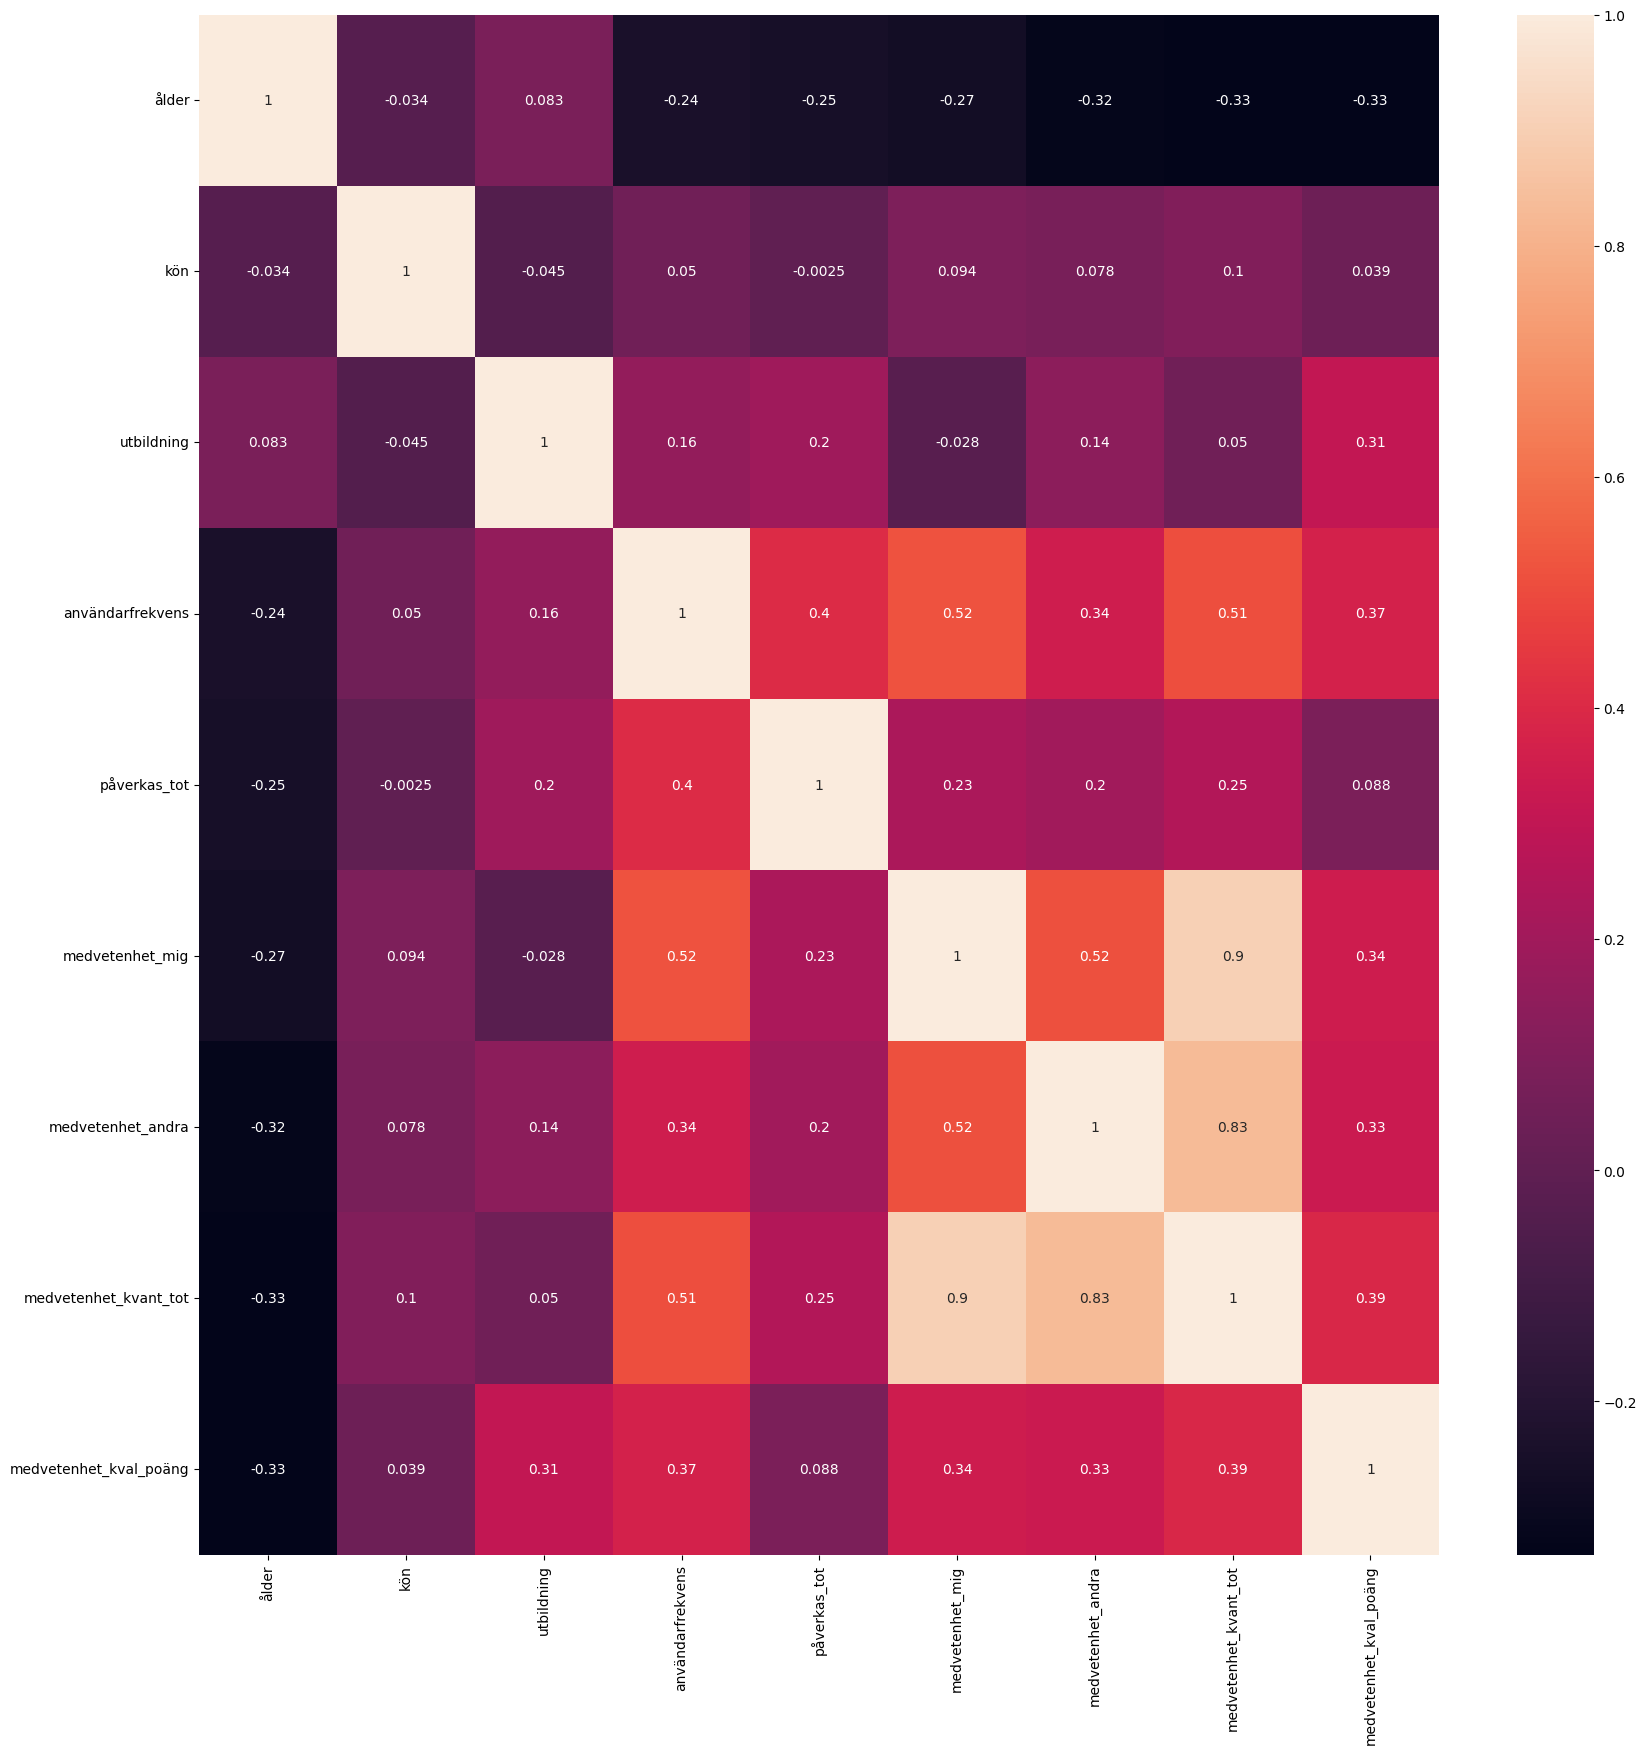

In [ ]:

#checking for correlations between demografical factors and RQ1's factors

correlations = df_rq1_scaled.corr(method='pearson')
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)


In [ ]:


# x = df_rq1_scaled.medvetenhet_andra.array.reshape((-1, 1))

# y = df_rq1_scaled.medvetenhet_mig


# model = LinearRegression()

# model.fit(x, y)


# r_sq = model.score(x, y)
# print(f"coefficient of determination: {r_sq}")

In [ ]:
#plt.scatter(x=df.ålder, y=df.utbildning)

# Research Question 2

<AxesSubplot:>

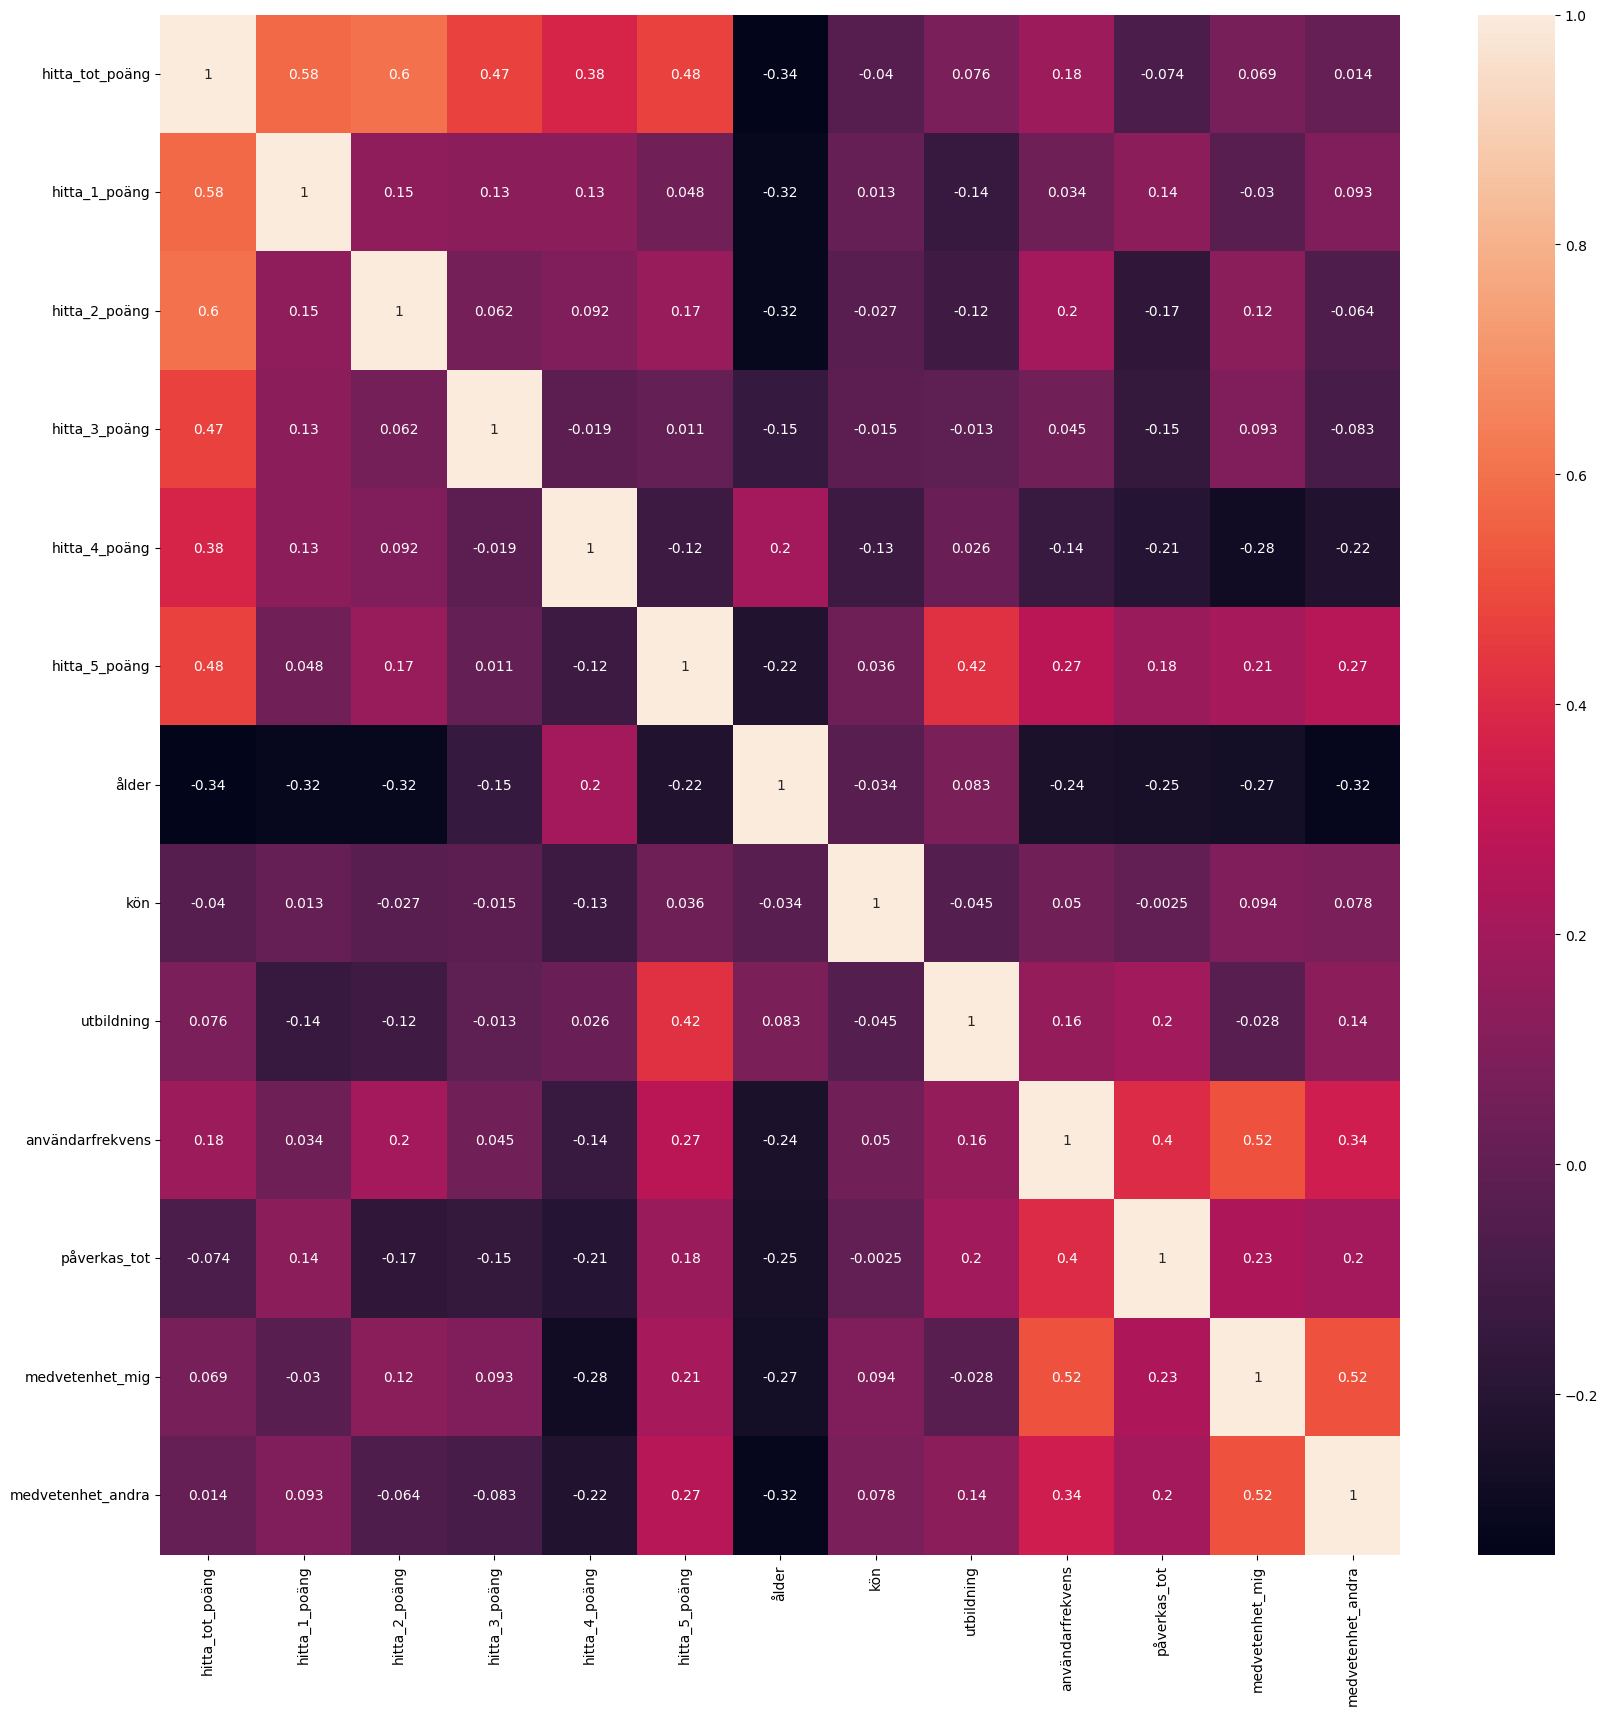

In [ ]:
#RQ2. Measuring the respondents ability to recognize manipulative design on Streaming Services

#To measure this, the following columns are involved:
# - hitta_1_poäng
# - hitta_2_poäng
# - hitta_3_poäng
# - hitta_4_poäng
# - hitta_5_poäng

#And to measure demografical differences:
# - ålder
# - kön
# - utbildning
# - användarfrekvens
# - påverkas_tot




df_rq2_scaled = df_scaled[['hitta_tot_poäng', 'hitta_1_poäng', 'hitta_2_poäng', 'hitta_3_poäng', 'hitta_4_poäng', 'hitta_5_poäng', 'ålder', 'kön', 'utbildning', 'användarfrekvens', 'påverkas_tot', 'medvetenhet_mig', 'medvetenhet_andra']]

correlations = df_rq2_scaled.corr(method='pearson')
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)



In [ ]:
df[(df['hitta_1_poäng'] == 1.0) & (df['hitta_2_poäng'] == 0.0) & (df['hitta_3_poäng'] == 1.0) & (df['hitta_4_poäng'] == 1.0) & (df['hitta_5_poäng'] == 1.0)]

,Submission Date,ålder,kön,utbildning,medvetenhet_andra,medvetenhet_mig,medvetenhet_kval,medvetenhet_kval_poäng,användarfrekvens,påverkas_autoplay,...,övriga_kommentarer,id,påverkas_tot,år_född,medvetenhet_kvant_tot,medvetenhet_abs_delta,hitta_tot_poäng,medel_hitta_poäng,finner_acceptabel_tot,självrapporterat_påverkad_tot


In [ ]:
# RQ2

# - ålder
# - utlbildning
# - kön
# - användarfrekvens
# - påverkas_tot

# code taken from: https://www.statology.org/how-to-calculate-vif-in-python/ 

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('hitta_tot_poäng ~ ålder+utbildning+kön+användarfrekvens+påverkas_tot', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,32.579118,Intercept
1,1.124430,ålder
2,1.077619,utbildning
3,1.006066,kön
4,1.243938,användarfrekvens
5,1.270890,påverkas_tot


In [ ]:
#RQ2

df.hitta_kontroll_poäng.value_counts().apply(lambda x: round(x/56 * 100))
# df.hitta_1_poäng.value_counts().apply(lambda x: round(x/56 * 100))
# df.hitta_2_poäng.value_counts().apply(lambda x: round(x/56 * 100))
# df.hitta_3_poäng.value_counts().apply(lambda x: round(x/56 * 100))
# df.hitta_4_poäng.value_counts().apply(lambda x: round(x/56 * 100))
# df.hitta_5_poäng.value_counts().apply(lambda x: round(x/56 * 100))


1.0    70
0.5    23
0.0     7
Name: hitta_kontroll_poäng, dtype: int64

In [ ]:
#RQ2

# - ålder
# - utlbildning
# - kön
# - användarfrekvens
# - påverkningsbar

# some of the code is from: https://www.statology.org/ols-regression-python/

import statsmodels.api as sm

# Millenials/ gen y
x = df[(df['år_född'] >= 1977) & (df['år_född'] <= 1995)]['ålder']
y = df[(df['år_född'] >= 1977) & (df['år_född'] <= 1995)]['hitta_1_poäng']

# # generation Z
# x = df[(df['år_född'] > 1995)]['ålder']
# y = df[(df['år_född'] > 1995)]['hitta_5_poäng']


# x = df.ålder
# y = df.hitta_kontroll_poäng


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          hitta_1_poäng   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     5.110
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0357
Time:                        23:27:00   Log-Likelihood:                -8.9715
No. Observations:                  21   AIC:                             21.94
Df Residuals:                      19   BIC:                             24.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8289      0.521      3.510      0.0

In [ ]:
#RQ2

# Silent generation
df[(df['år_född'] >= 1928) & (df['år_född'] <= 1945)]

#generation Baby Boomer
# df[(df['år_född'] >= 1946) & (df['år_född'] <= 1964)]

# generation X
# df[(df['år_född'] >= 1965) & (df['år_född'] <= 1976)]
# df[(df['år_född'] >= 1965) & (df['år_född'] <= 1976)]

# Millenials
# df[(df['år_född'] >= 1977) & (df['år_född'] <= 1995)]
# df[(df['år_född'] >= 1977) & (df['år_född'] <= 1995)]

# generation Z
# df[(df['år_född'] > 1995)]
# df[(df['år_född'] > 1995)]

,Submission Date,ålder,kön,utbildning,medvetenhet_andra,medvetenhet_mig,medvetenhet_kval,medvetenhet_kval_poäng,användarfrekvens,påverkas_autoplay,...,övriga_kommentarer,id,påverkas_tot,år_född,medvetenhet_kvant_tot,medvetenhet_abs_delta,hitta_tot_poäng,medel_hitta_poäng,finner_acceptabel_tot,självrapporterat_påverkad_tot


In [ ]:
# RQ2

# Silent generation
# x = df[(df['år_född'] >= 1928) & (df['år_född'] <= 1945)]['ålder']
# y = df[(df['år_född'] >= 1928) & (df['år_född'] <= 1945)]['medel_hitta_poäng']

#generation Baby Boomer
# x = df[(df['år_född'] >= 1946) & (df['år_född'] <= 1964)]['ålder']
# y = df[(df['år_född'] >= 1946) & (df['år_född'] <= 1964)]['medel_hitta_poäng']

# generation X
# x = df[(df['år_född'] >= 1965) & (df['år_född'] <= 1976)]['ålder']
# y = df[(df['år_född'] >= 1965) & (df['år_född'] <= 1976)]['medel_hitta_poäng']

# Millenials/ gen y
# x = df[(df['år_född'] >= 1977) & (df['år_född'] <= 1995)]['ålder']
# y = df[(df['år_född'] >= 1977) & (df['år_född'] <= 1995)]['medel_hitta_poäng']

# generation Z
x = df[(df['år_född'] > 1995)]['ålder']
y = df[(df['år_född'] > 1995)]['medel_hitta_poäng']

# generation alpha
# x = df[(df['år_född'] > 2002)]['ålder']
# y = df[(df['år_född'] > 2002)]['medel_hitta_poäng']


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      medel_hitta_poäng   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     6.201
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0204
Time:                        23:27:00   Log-Likelihood:                 9.2650
No. Observations:                  25   AIC:                            -14.53
Df Residuals:                      23   BIC:                            -12.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4935      0.410      3.642      0.0

In [ ]:
# RQ2

# ingen gymnasieutbildning
x = df[(df['utbildning'] == 4)]['utbildning']
y = df[(df['utbildning'] == 4)]['medel_hitta_poäng']

# kandidatexamen
# x = df[(df['utbildning'] == 3)]['ålder']
# y = df[(df['utbildning'] == 3)]['medel_hitta_poäng']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      medel_hitta_poäng   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 21 Dec 2022   Prob (F-statistic):                nan
Time:                        23:27:00   Log-Likelihood:                 1.9127
No. Observations:                   4   AIC:                            -1.825
Df Residuals:                       3   BIC:                            -2.439
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
utbildning     0.1375      0.022      6.351      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Research Question 3

In [ ]:
# RQ3

# - medvetenhet_mig
# - finner_acceptabel_tot
# - medel_hitta_poäng
# - självrapporterat_påverkad_tot
# - ålder
# - utlbildning
# - kön
# - användarfrekvens
# - påverkas_tot


#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('hitta_tot_poäng ~ medvetenhet_mig+finner_acceptabel_tot+medel_hitta_poäng+självrapporterat_påverkad_tot+ålder+utbildning+kön+användarfrekvens+påverkas_tot', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,51.627317,Intercept
1,1.572716,medvetenhet_mig
2,1.257306,finner_acceptabel_tot
3,1.274306,medel_hitta_poäng
4,1.468343,självrapporterat_påverkad_tot
5,1.685114,ålder
6,1.122327,utbildning
7,1.017826,kön
8,1.651597,användarfrekvens
9,1.465061,påverkas_tot


In [ ]:
# RQ3

# - medvetenhet_mig
# - självrapporterat_påverkad_tot

x = df.medvetenhet_mig
y = df.självrapporterat_påverkad_tot

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())



                                  OLS Regression Results                                 
Dep. Variable:     självrapporterat_påverkad_tot   R-squared:                       0.062
Model:                                       OLS   Adj. R-squared:                  0.045
Method:                            Least Squares   F-statistic:                     3.578
Date:                           Wed, 21 Dec 2022   Prob (F-statistic):             0.0639
Time:                                   23:27:01   Log-Likelihood:                -148.98
No. Observations:                             56   AIC:                             302.0
Df Residuals:                                 54   BIC:                             306.0
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [ ]:
# RQ3

# - medel_hitta_poäng
# - självrapporterat_påverkad_tot

x = df.medel_hitta_poäng
y = df.självrapporterat_påverkad_tot

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())



                                  OLS Regression Results                                 
Dep. Variable:     självrapporterat_påverkad_tot   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.016
Method:                            Least Squares   F-statistic:                    0.1222
Date:                           Wed, 21 Dec 2022   Prob (F-statistic):              0.728
Time:                                   23:27:01   Log-Likelihood:                -150.71
No. Observations:                             56   AIC:                             305.4
Df Residuals:                                 54   BIC:                             309.5
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [ ]:
# RQ3

# - finner_acceptabel_tot
# - självrapporterat_påverkad_tot

x = df.finner_acceptabel_tot
y = df.självrapporterat_påverkad_tot

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     självrapporterat_påverkad_tot   R-squared:                       0.025
Model:                                       OLS   Adj. R-squared:                  0.007
Method:                            Least Squares   F-statistic:                     1.409
Date:                           Wed, 21 Dec 2022   Prob (F-statistic):              0.240
Time:                                   23:27:01   Log-Likelihood:                -150.05
No. Observations:                             56   AIC:                             304.1
Df Residuals:                                 54   BIC:                             308.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------

In [ ]:
# RQ3

# - ålder
# - utbildning
# - kön
# - användarfrekvens
# - påverkas_tot
# - självrapporterat_påverkad_tot

x = df.påverkas_tot
y = df.självrapporterat_påverkad_tot

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     självrapporterat_påverkad_tot   R-squared:                       0.134
Model:                                       OLS   Adj. R-squared:                  0.118
Method:                            Least Squares   F-statistic:                     8.345
Date:                           Wed, 21 Dec 2022   Prob (F-statistic):            0.00556
Time:                                   23:27:01   Log-Likelihood:                -146.75
No. Observations:                             56   AIC:                             297.5
Df Residuals:                                 54   BIC:                             301.6
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [ ]:
#RQ3

#mean, standard deviation, median and mode of självrapporterat_påverkad_1
print("median: ", statistics.median(df.självrapporterat_påverkad_1))
print("mode: ", statistics.mode(df.självrapporterat_påverkad_1))
print("mean: ", statistics.mean(df.självrapporterat_påverkad_1))
print("SD: ", statistics.stdev(df.självrapporterat_påverkad_1))

median:  1.0
mode:  1
mean:  0.8571428571428571
SD:  1.0344708164708514


In [ ]:
#RQ3

#mean, standard deviation, median and mode of självrapporterat_påverkad_2
print("median: ", statistics.median(df.självrapporterat_påverkad_2))
print("mode: ", statistics.mode(df.självrapporterat_påverkad_2))
print("mean: ", statistics.mean(df.självrapporterat_påverkad_2))
print("SD: ", statistics.stdev(df.självrapporterat_påverkad_2))

median:  1.0
mode:  1
mean:  0.42857142857142855
SD:  1.3464720617179597


In [ ]:
#RQ3

#mean, standard deviation, median and mode of självrapporterat_påverkad_3
print("median: ", statistics.median(df.självrapporterat_påverkad_3))
print("mode: ", statistics.mode(df.självrapporterat_påverkad_3))
print("mean: ", statistics.mean(df.självrapporterat_påverkad_3))
print("SD: ", statistics.stdev(df.självrapporterat_påverkad_3))

median:  1.0
mode:  1
mean:  0.6607142857142857
SD:  1.0317995879095851


In [ ]:
#RQ3

#mean, standard deviation, median and mode of självrapporterat_påverkad_4
print("median: ", statistics.median(df.självrapporterat_påverkad_4))
print("mode: ", statistics.mode(df.självrapporterat_påverkad_4))
print("mean: ", statistics.mean(df.självrapporterat_påverkad_4))
print("SD: ", statistics.stdev(df.självrapporterat_påverkad_4))

median:  0.0
mode:  0
mean:  0.16071428571428573
SD:  1.187461550983835


In [ ]:
#RQ3

#mean, standard deviation, median and mode of självrapporterat_påverkad_5
print("median: ", statistics.median(df.självrapporterat_påverkad_5))
print("mode: ", statistics.mode(df.självrapporterat_påverkad_5))
print("mean: ", statistics.mean(df.självrapporterat_påverkad_5))
print("SD: ", statistics.stdev(df.självrapporterat_påverkad_5))

median:  1.0
mode:  1
mean:  0.9107142857142857
SD:  1.083374957575307


In [ ]:
#RQ3

#mean, standard deviation, median and mode of finner_acceptabel 1-5

# print("mean: ", statistics.mean(df.finner_acceptabel_1))
# print("SD: ", statistics.stdev(df.finner_acceptabel_1))
# print("median: ", statistics.median(df.finner_acceptabel_1))
# print("mode: ", statistics.mode(df.finner_acceptabel_1))

# print("mean: ", statistics.mean(df.finner_acceptabel_2))
# print("SD: ", statistics.stdev(df.finner_acceptabel_2))
# print("median: ", statistics.median(df.finner_acceptabel_2))
# print("mode: ", statistics.mode(df.finner_acceptabel_2))

# print("mean: ", statistics.mean(df.finner_acceptabel_3))
# print("SD: ", statistics.stdev(df.finner_acceptabel_3))
# print("median: ", statistics.median(df.finner_acceptabel_3))
# print("mode: ", statistics.mode(df.finner_acceptabel_3))

# print("mean: ", statistics.mean(df.finner_acceptabel_4))
# print("SD: ", statistics.stdev(df.finner_acceptabel_4))
# print("median: ", statistics.median(df.finner_acceptabel_4))
# print("mode: ", statistics.mode(df.finner_acceptabel_4))

print("mean: ", statistics.mean(df.finner_acceptabel_5))
print("SD: ", statistics.stdev(df.finner_acceptabel_5))
print("median: ", statistics.median(df.finner_acceptabel_5))
print("mode: ", statistics.mode(df.finner_acceptabel_5))

mean:  0.017857142857142856
SD:  1.1035656495456638
median:  0.0
mode:  1


In [ ]:
# mörka_mönster = ['hitta_1']

# osäkra = df.loc[:, df['hitta_1_poäng'] == 0]
# hittade = df.loc[:, df['hitta_1_poäng'] == 1]

# x = np.arange(len(mörka_mönster))
# width = 0.35

# fig, ax = plt.subplots()
# bar1 = ax.bar(x - width/2, osäkra, width, label="Osäkra")
# bar1 = ax.bar(x - width/2, hittade, width, label="Hittade")

# ax.set_xticks(x)
# ax.set_xticklabels(mörka_mönster)
# ax.legend()

# plt.show()

In [ ]:
# RQ3:
# - självrapporterat_påverkad_1
# - självrapporterat_påverkad_2
# - självrapporterat_påverkad_3
# - självrapporterat_påverkad_4
# - självrapporterat_påverkad_5

# - påverkas_autoplay
# - påverkas_gömdaFeat
# - påverkas_överväldRek
# - påverkas_rekom
# - påverkas_snabbtitt

# Ability to recognize (RQ2) & awerness (RQ1)
# - hitta_tot_poäng
# - medvetenhet_mig

# DEMOGRAFIC
# - ålder
# - kön
# - utbildning
# - användarfrekvens


df_rq3_scaled = df_scaled[['självrapporterat_påverkad_1', 'självrapporterat_påverkad_2', 'självrapporterat_påverkad_3', 'självrapporterat_påverkad_4', 'självrapporterat_påverkad_5', 'hitta_tot_poäng', 'medvetenhet_mig', 'ålder', 'kön', 'utbildning', 'användarfrekvens', 'påverkas_tot']].copy()


#display(df_rq3_scaled)
 

<AxesSubplot:>

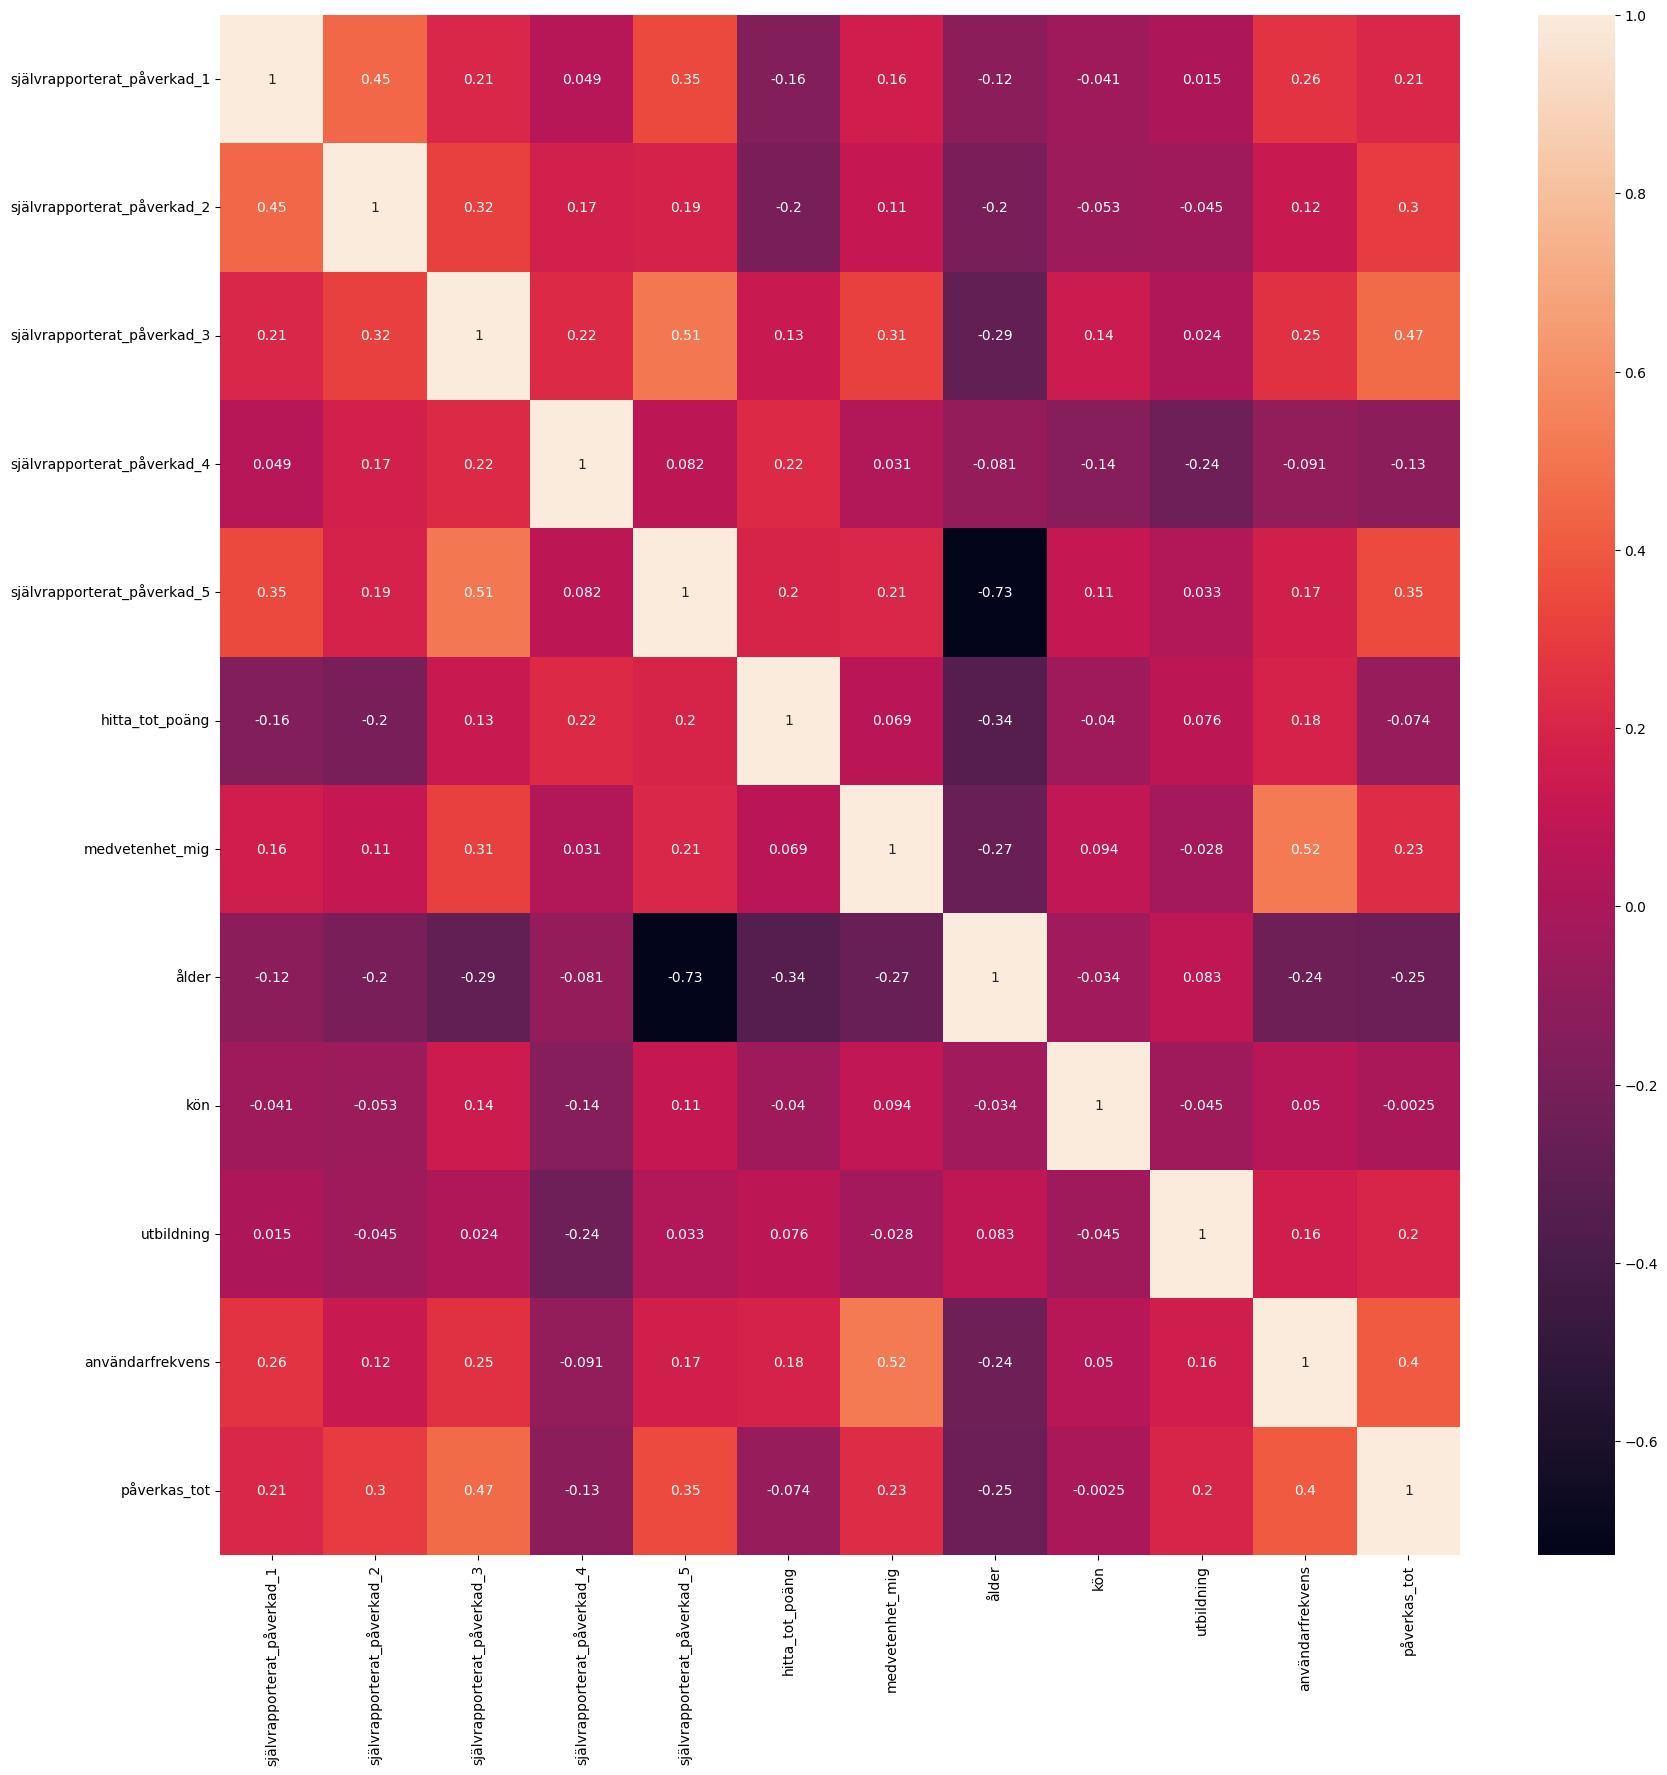

In [ ]:
correlations = df_rq3_scaled.corr(method='pearson')
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [ ]:
import math

# Get pairwise correlation coefficients
cor = df_rq3_scaled.corr()

# Independent variables
x1 = 'hitta_tot_poäng'
x2 = 'medvetenhet_mig'

# Dependent variable
y = 'självrapporterat_påverkad_1'

# Pairings
x1y = cor.loc[ x1, y ]
x2y = cor.loc[ x2, y ]
x1x2 = cor.loc[ x1, x2 ]

Rx1x2y = math.sqrt((abs(x1y**2) + abs(x2y**2) - 2*x1y*x2y*x1x2) / (1-abs(x1x2**2)) )
R2 = Rx1x2y**2

# Calculate adjusted R-squared
n = len(df_rq3_scaled) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )

print(R2)
print(R2_adj)

0.05505711217949954
0.01939888999759376
